In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/grassknoted/asl-alphabet")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pathanali
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet


100%|██████████| 1.03G/1.03G [00:05<00:00, 213MB/s]


In [5]:
!pip install opendatasets tensorflow keras opencv-python matplotlib seaborn scikit-learn

In [6]:
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
dataset_url = "https://www.kaggle.com/datasets/grassknoted/asl-alphabet"
od.download(dataset_url)

# After download, dataset path will be: /content/asl-alphabet
# Inside: asl_alphabet_train/ and asl_alphabet_test/


Skipping, found downloaded files in "./asl-alphabet" (use force=True to force download)


In [8]:
train_dir = "/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
test_dir = "/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test"


In [9]:
IMG_HEIGHT, IMG_WIDTH = 64, 64
BATCH_SIZE = 64

# =============================================
# 🔹 Data Preprocessing & Augmentation
# =============================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    validation_split=0.2  # 20% for validation
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("\n Data loaded successfully!")

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.

 Data loaded successfully!


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # 29 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,820,445 (18.39 MB)

 Trainable params: 4,819,997 (18.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('asl_cnn_best_model.h5', monitor='val_accuracy', save_best_only=True)


In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.1798 - loss: 2.9902

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 181s 156ms/step - accuracy: 0.1798 - loss: 2.9897 - val_accuracy: 0.1994 - val_loss: 4.0128
Epoch 2/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5440 - loss: 1.4104

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 171s 157ms/step - accuracy: 0.5441 - loss: 1.4102 - val_accuracy: 0.5193 - val_loss: 1.6408
Epoch 3/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7634 - loss: 0.6977

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 159s 146ms/step - accuracy: 0.7634 - loss: 0.6976 - val_accuracy: 0.7301 - val_loss: 0.9721
Epoch 4/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 162s 149ms/step - accuracy: 0.8546 - loss: 0.4405 - val_accuracy: 0.7020 - val_loss: 1.3739
Epoch 5/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 158s 145ms/step - accuracy: 0.8931 - loss: 0.3236 - val_accuracy: 0.6647 - val_loss: 2.3174
Epoch 6/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9214 - loss: 0.2391

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 159s 146ms/step - accuracy: 0.9214 - loss: 0.2391 - val_accuracy: 0.8034 - val_loss: 0.6471
Epoch 7/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 158s 145ms/step - accuracy: 0.9331 - loss: 0.2134 - val_accuracy: 0.7669 - val_loss: 0.9469
Epoch 8/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 160s 147ms/step - accuracy: 0.9400 - loss: 0.1950 - val_accuracy: 0.5868 - val_loss: 2.7747
Epoch 9/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 158s 145ms/step - accuracy: 0.9490 - loss: 0.1685 - val_accuracy: 0.7479 - val_loss: 1.1768


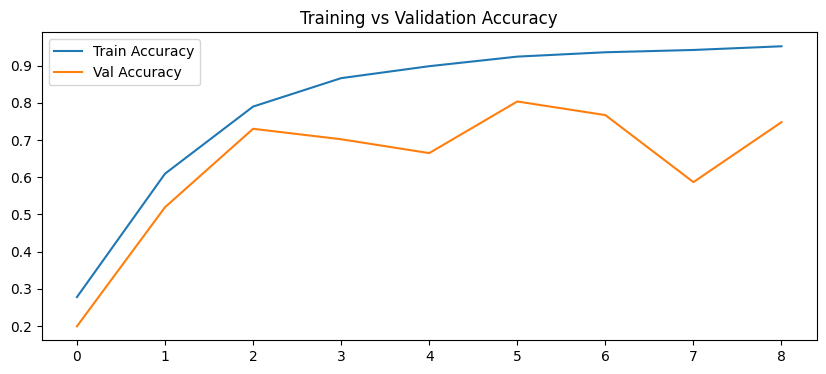

In [13]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [14]:
loss, accuracy = model.evaluate(val_data)
print(f"\n Validation Accuracy: {accuracy*100:.2f}%")

272/272 ━━━━━━━━━━━━━━━━━━━━ 32s 116ms/step - accuracy: 0.7992 - loss: 0.6500

✅ Validation Accuracy: 80.28%


272/272 ━━━━━━━━━━━━━━━━━━━━ 31s 112ms/step


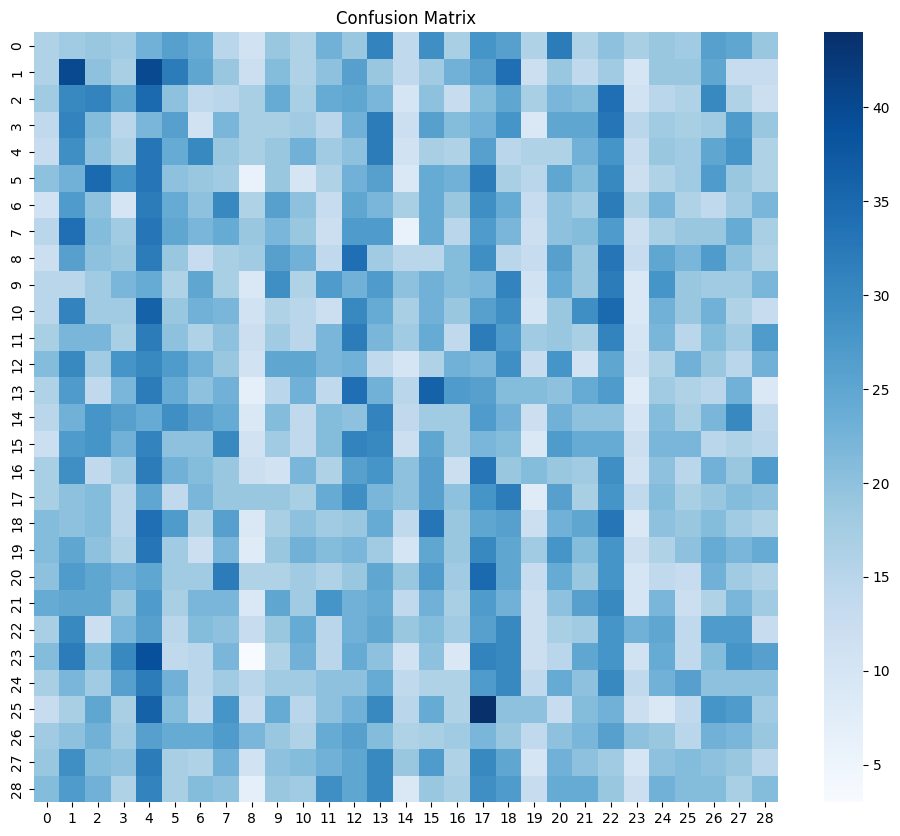


📊 Classification Report:

              precision    recall  f1-score   support

           A       0.03      0.03      0.03       600
           B       0.05      0.07      0.06       600
           C       0.05      0.05      0.05       600
           D       0.03      0.03      0.03       600
           E       0.04      0.06      0.04       600
           F       0.03      0.03      0.03       600
           G       0.04      0.03      0.03       600
           H       0.04      0.04      0.04       600
           I       0.05      0.03      0.04       600
           J       0.05      0.05      0.05       600
           K       0.03      0.03      0.03       600
           L       0.04      0.04      0.04       600
           M       0.03      0.04      0.03       600
           N       0.03      0.04      0.03       600
           O       0.03      0.02      0.03       600
           P       0.04      0.04      0.04       600
           Q       0.02      0.02      0.02       600


In [15]:
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_data.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("\n Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))

In [1]:
model.save('asl_cnn_model_final.h5')
print("\n Model saved as 'asl_cnn_model_final.h5'")

loaded_model = load_model('asl_cnn_model_final.h5')
print(" Model loaded successfully!")

NameError: name 'model' is not defined

In [17]:
import glob


test_images = glob.glob(os.path.join(test_dir, "*.jpg"))

print(f"\nFound {len(test_images)} test images. Predicting first 5...\n")

for img_path in test_images[:5]:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = np.expand_dims(img, axis=0) / 255.0

    pred = loaded_model.predict(img)
    pred_class = list(train_data.class_indices.keys())[np.argmax(pred)]

    print(f" {os.path.basename(img_path)} → Predicted Sign: {pred_class}")


Found 28 test images. Predicting first 5...

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
🖼️ O_test.jpg → Predicted Sign: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
🖼️ T_test.jpg → Predicted Sign: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
🖼️ J_test.jpg → Predicted Sign: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
🖼️ K_test.jpg → Predicted Sign: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
🖼️ space_test.jpg → Predicted Sign: C


In [18]:
img_path = "/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/F_test.jpg"

img = cv2.imread(img_path)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
img = np.expand_dims(img, axis=0) / 255.0

# Predict
prediction = loaded_model.predict(img)
predicted_class = list(train_data.class_indices.keys())[np.argmax(prediction)]

print(f" Predicted Sign: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
🖼️ Predicted Sign: F


In [19]:
img_path = "/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/F_test.jpg"

img = cv2.imread(img_path)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
img = np.expand_dims(img, axis=0) / 255.0

# Predict
prediction = loaded_model.predict(img)
predicted_class = list(train_data.class_indices.keys())[np.argmax(prediction)]

print(f" Predicted Sign: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🖼️ Predicted Sign: F


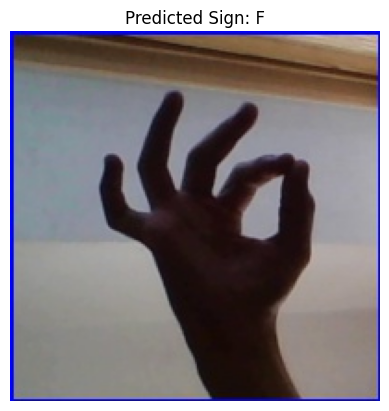

In [20]:
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Sign: {predicted_class}")
plt.axis('off')
plt.show()


In [21]:
img_path = os.path.join(test_dir, "/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/O_test.jpg")

img = cv2.imread(img_path)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
img = np.expand_dims(img, axis=0) / 255.0

prediction = loaded_model.predict(img)
predicted_class = list(train_data.class_indices.keys())[np.argmax(prediction)]

print(f" Predicted Sign: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
🖼️ Predicted Sign: O
